<a href="https://colab.research.google.com/github/swethanjali24/DecisionTree_Assignment/blob/main/Heart_disease_prediction_DecisionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [ ]:
# Loading the data
df=pd.read_csv('/content/drive/MyDrive/assignments-BE/DecisionTree/heart.csv.xls')
df.shape# 1025R*14C
df.head() # all are numerical columns
df['target'].value_counts() # almost balanced dataset
df.isnull().sum().any()# no null values
df.duplicated().sum()# there are duplicate values
duplicates = df[df.duplicated(keep='first')]
print(duplicates)
duplicates.shape
df.drop_duplicates(keep='first',inplace=True)
df.duplicated().sum()# no duplicates
df.shape



      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
15     34    0   1       118   210    0        1      192      0      0.7   
31     50    0   1       120   244    0        1      162      0      1.1   
43     46    1   0       120   249    0        0      144      0      0.8   
55     55    1   0       140   217    0        1      111      1      5.6   
61     66    0   2       146   278    0        0      152      0      0.0   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
15        2   0     2       1  
31        2

(302, 14)

In [ ]:
# EDA
print(df.describe())
print(df.info())


             age         sex          cp    trestbps        chol         fbs  \
count  302.00000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.42053    0.682119    0.963576  131.602649  246.500000    0.149007   
std      9.04797    0.466426    1.032044   17.563394   51.753489    0.356686   
min     29.00000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.00000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.50000    1.000000    1.000000  130.000000  240.500000    0.000000   
75%     61.00000    1.000000    2.000000  140.000000  274.750000    0.000000   
max     77.00000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean     0.526490  149.569536    0.327815    1.043046    1.397351    0.718543   
std      0.526027   22.903527    0.4

In [ ]:
# Separating inout and output
X=df.drop('target',axis=1)
y=df['target']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled=scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled, columns=df.columns)
df_scaled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.479167,1.0,0.0,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.000000,0.0
1,0.500000,1.0,0.0,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000,0.0
2,0.854167,1.0,0.0,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000,0.0
3,0.666667,1.0,0.0,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.000000,0.0
4,0.687500,0.0,0.0,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667,0.0


In [ ]:
df_scaled.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<Axes: >

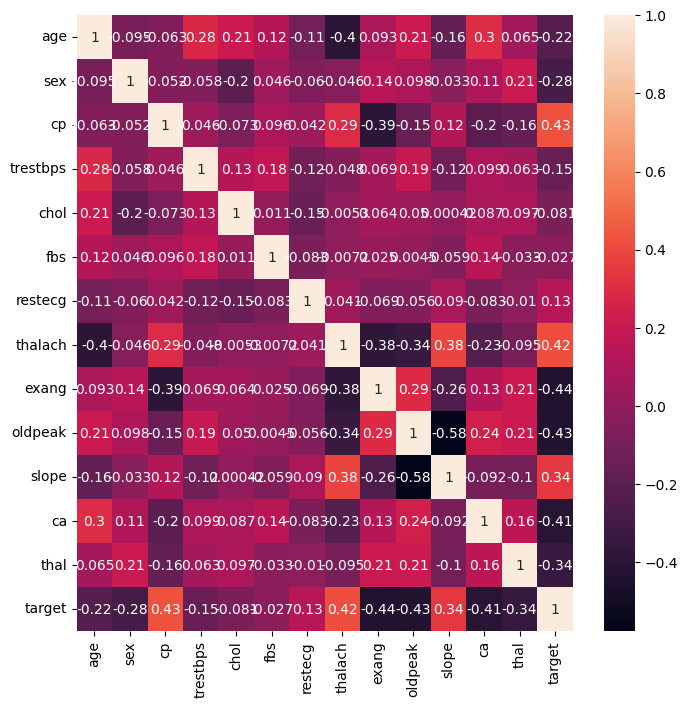

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df_scaled.corr(),annot=True)

In [ ]:
# All features seem to be important


In [ ]:
# Splitting the data into input and output
X=df_scaled.drop('target',axis=1)
y=df_scaled['target']

In [ ]:
# performing traintest split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [ ]:
# Loading the model
clf=DecisionTreeClassifier()
# fitting the model
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
# predicting the model
y_pred=clf.predict(X_test)
y_pred_train=clf.predict(X_train)

In [ ]:
# Performace evaluation
print('Training Accuracy:',np.round(metrics.accuracy_score(y_train,y_pred_train),3))
print('Training Precision:',np.round(metrics.precision_score(y_train,y_pred_train),3))
print('Training Recall:',np.round(metrics.recall_score(y_train,y_pred_train),3))
print('Training F1 Score:',np.round(metrics.f1_score(y_train,y_pred_train),3))

print('\nTesting Accuracy:',np.round(metrics.accuracy_score(y_test,y_pred),3))
print('Testing Precision:',np.round(metrics.precision_score(y_test,y_pred),3))
print('Testing Recall:',np.round(metrics.recall_score(y_test,y_pred),3))
print('Testing F1 Score:',np.round(metrics.f1_score(y_test,y_pred),3))


Training Accuracy: 1.0
Training Precision: 1.0
Training Recall: 1.0
Training F1 Score: 1.0

Testing Accuracy: 0.639
Testing Precision: 0.714
Testing Recall: 0.676
Testing F1 Score: 0.694


In [ ]:
# highly overfitting model
# Performing hyperparameter optimization

In [ ]:
# using GridSearchCV
from sklearn.model_selection import GridSearchCV
params={
    'criterion':['gini','entropy'],
    'max_depth':[1,2,3,4,5,6,7,8,9,10],
    'min_samples_split':[2,3,4,5,6,7,8,9,10],
    'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10]
}
grid_search=GridSearchCV(estimator=clf,param_grid=params,cv=5,verbose=1)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                              min_samples_leaf=2,
                                              min_samples_split=9),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             verbose=1)

In [ ]:
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 9}


In [ ]:
# using the optimized model
clf=DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_leaf=2,min_samples_split=9)
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       min_samples_split=9)

In [ ]:
y_pred=clf.predict(X_test)
y_pred_train=clf.predict(X_train)

In [ ]:
# Performace evaluation
print('Training Accuracy:',np.round(metrics.accuracy_score(y_train,y_pred_train),3))
print('Training Precision:',np.round(metrics.precision_score(y_train,y_pred_train),3))
print('Training Recall:',np.round(metrics.recall_score(y_train,y_pred_train),3))
print('Training F1 Score:',np.round(metrics.f1_score(y_train,y_pred_train),3))

print('\nTesting Accuracy:',np.round(metrics.accuracy_score(y_test,y_pred),3))
print('Testing Precision:',np.round(metrics.precision_score(y_test,y_pred),3))
print('Testing Recall:',np.round(metrics.recall_score(y_test,y_pred),3))
print('Testing F1 Score:',np.round(metrics.f1_score(y_test,y_pred),3))


Training Accuracy: 0.913
Training Precision: 0.934
Training Recall: 0.898
Training F1 Score: 0.916

Testing Accuracy: 0.689
Testing Precision: 0.75
Testing Recall: 0.73
Testing F1 Score: 0.74


In [ ]:
# Overfitting is slighlty reduced
